## Modules

In [1]:
import os
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
 
from datetime import datetime, timedelta
from itertools import product
from scipy.stats import norm

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Binary game Simulation

### Fixed-percent-betting simulation

In [2]:
def getSim_fixPctBet(initAmount=100, f=12.5, p=0.5, b=1.5, numTrial=50, numSim=400):
    """
    Obtain dictionary of equal-percent-bet simulation results.
    initAmount: initial amount for betting
    f: percent per bet
    p: winning probability
    numTrials: number of trials of the same binary game
    numSim: number of binary simulations
    """
    # Dict for recording different series of profit/loss
    dictSim = {}
    # Dict for recording different series of capital (total equity)
    dictAmount = {}
    # Generate a total of `numSim`= N series of binary game result and P/L 
    for num in range(numSim):
        # Generate a series of "1"/"0" with probability p
        stepfunc = lambda x: 1 if x > 0 else 0  # Lambda Function for getting "1" with a fixed prob and "0" otherwise
        arrSign = np.array([stepfunc(r) for r in np.random.uniform(p-1, p, numTrial)])
        # Series of asset growth factor based on win/loss result (EITHER (1 + b * f%) OR (1 -f%))
        arrTrial = 1 + f * ((b + 1) * arrSign - 1) / 100
        # Record the asset growth factor series into `dictSim`
        dictSim[num + 1] = arrTrial 
        # Array of total equity and record into `dictAmount`
        dictAmount[f's{num + 1}'] = initAmount * arrTrial.cumprod()
    # Form dataframe from the `dictAmount` and transpose, so that each row corresponds to a betting series
    dfSim = pd.DataFrame(dictAmount).transpose()
    # Rename columns so that each number in column labels corresponds to the k-th trial
    dfSim = dfSim.rename(columns={k: (k+1) for k in dfSim.columns})
    
    return dfSim

### Performance KPIs: winning rate, RRR (Realized reward-risk ratio), profit factor

In [3]:
def getProfitfactor(p, b):
    """Get profit factor of a binary game."""
    return round(p * b / (1 - p), 4)

def getOdds(p, pf):
    """Given fixed winning rate and profit factor, find odds (or reward-risk ratio)."""
    return pf * (1 - p) / p

def getWinrate(b, pf):
    """Given fixed odds and profit factor, find winning rate."""   
    return pf / (pf + b)

### Sample of 20 fixed-percent-betting simulations of 12 trials

In [4]:
initAmount0 = 100  # Initial capital
f0 = 20  # Fixed amount per bet
p0 = 0.5   # winning probability
b0 = 1.6   # reward-risk ratio / odds
numTrial0 = 12 # Number of trials
numSim0 = 10  # Number of simulations (how many people keep playing same game for 12 runs)

pf0 = round(getProfitfactor(p0, b0), 4)
print(f'Profit Factor = {pf0}')

dfSim0 = np.round(getSim_fixPctBet(initAmount0, f0, p0, b0, numTrial0, numSim0), 2)
dfSim0

Profit Factor = 1.6


1       2       3       4       5       6       7       8       9   \
s1   132.0  105.60   84.48  111.51   89.21   71.37   57.09   45.68   60.29   
s2    80.0  105.60  139.39  111.51  147.20  194.30  155.44  124.35   99.48   
s3    80.0   64.00   84.48   67.58   54.07   71.37   57.09   45.68   36.54   
s4   132.0  174.24  139.39  111.51  147.20  117.76   94.21  124.35  164.15   
s5   132.0  174.24  139.39  111.51   89.21   71.37   94.21  124.35  164.15   
s6    80.0   64.00   84.48   67.58   89.21   71.37   94.21   75.37   60.29   
s7    80.0  105.60  139.39  111.51   89.21   71.37   57.09   75.37   60.29   
s8    80.0  105.60   84.48  111.51   89.21  117.76   94.21   75.37   99.48   
s9   132.0  174.24  230.00  303.60  242.88  320.60  256.48  205.18  164.15   
s10   80.0  105.60  139.39  111.51  147.20  194.30  256.48  205.18  164.15   

         10      11      12  
s1    48.23   63.67   84.04  
s2   131.32  173.34  228.81  
s3    48.23   38.59   30.87  
s4   131.32  105.05  138.67  
s5   216.67  286.01  228.81  
s6    48.23   63.67   50.93  
s7    79.59  105.05   84.04  
s8    79.59   63.67   50.93  
s9   131.32  105.05  138.67  
s10  216.67  286.01  228.81

## Equity curve plotting

### Simulation KPI

In [5]:
def getSimKPI_fixPctBet(initAmount=100, f=12.5, p=0.5, b=1.5, numTrial=50, numSim=400):
    """Obtain a dictionary of final performance KPI of simulations. """
    dfSim = getSim_fixPctBet(initAmount, f, p, b, numTrial, numSim)
    dictKPI = {}
    dictKPI['p'] = p
    dictKPI['b'] = b
    dictKPI['f'] = f
    dictKPI['profitfactor'] = round(getProfitfactor(p, b), 4)
    dictKPI['win%'] = round(100 * dfSim[dfSim[numTrial] >= initAmount].shape[0] / numSim, 2)
    dictKPI['amountAvg'] = round(dfSim[numTrial].mean(), 2)
    dictKPI['amountMed'] = round(dfSim[numTrial].median(), 2)
    dictKPI['amountStd'] = round(dfSim[numTrial].std(), 2)      
    
    return dfSim, dictKPI

### Standard sample: p = 0.4, b = 2.0

In [6]:
initAmount1 = 100  
f1 = 10  
p1 = 0.4   
b1 = 2.0   
numTrial1 = 50 
numSim1 = 1000  

dfSim1, dictKPI1 = getSimKPI_fixPctBet(initAmount1, f1, p1, b1, numTrial1, numSim1)
dictKPI1

{'p': 0.4,
 'b': 2.0,
 'f': 10,
 'profitfactor': 1.3333,
 'win%': 68.7,
 'amountAvg': 269.66,
 'amountMed': 162.52,
 'amountStd': 323.88}

### Function

In [7]:
def plotSim_fixPctBet(initAmount=100, f=12.5, p=0.5, b=1.5, numTrial=50, numSim=400):
    """Plot equity curves from the betting simulations."""
    # Dataframe and KPI dict from `getsimkpi_fixPctBet()` function
    dfSim, dictKPI = getSimKPI_fixPctBet(initAmount, f, p, b, numTrial, numSim)
    # First line of diagram title
    title = f'{numSim} simulations of {numTrial}-step binary game \n'
    title += f'Winning rate {round(p, 4)}, odds {round(b, 4)}, {f}% per bet \n'

    # Percentage of final equity above or equal to initial amount 
    winrate = dictKPI['win%']
    amountAvg = dictKPI['amountAvg']  # Arithmetic mean of final equity
    amountMed = dictKPI['amountMed']  # Median of final equity
    amountStd = dictKPI['amountStd']  # SD of final equity
    profitfactor = dictKPI['profitfactor']

    # Attach key stats to title text
    title += f'Profit factor: {profitfactor}, final winrate: {winrate}% \n'
    title += f'Final equity mean: {amountAvg}, median: {amountMed}, SD: {amountStd}'

    # Plot figure & append title
    fig = plt.figure(figsize=(12, 9))
    fig.suptitle(title, fontsize=12)

    # Transpose the equity dataframe to plot 
    dfPlot = dfSim.transpose()

    # Adopt semi-log scale for fixed-percent-betting & linear scale for fixed-amount-betting
    plt.semilogy(dfPlot)
    plt.plot(dfPlot.index, np.repeat(initAmount, numTrial), color='black', linewidth=3, linestyle='dashed')
    plt.show()

### Sample of 1000 simulations of 50-trial fixed-percent-betting trials

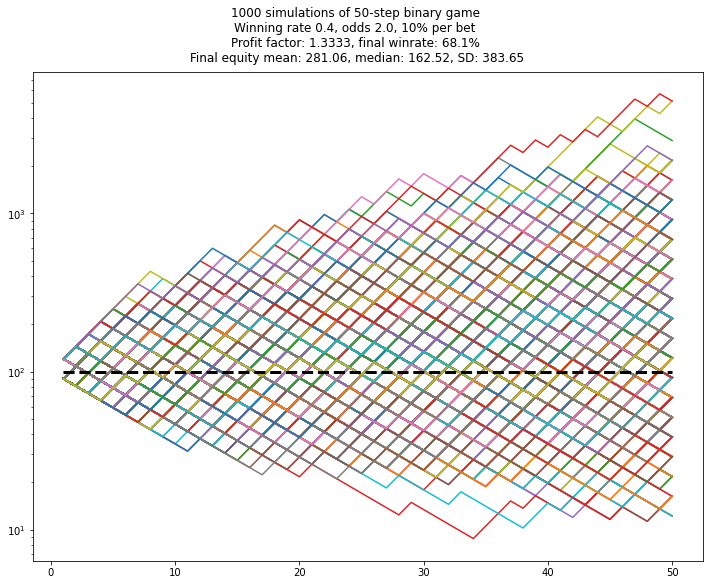

In [8]:
plotSim_fixPctBet(initAmount1, f1, p1, b1, numTrial1, numSim1)

### Raising winning rate & fix percent-per-bet, profit factor (odds reduced)

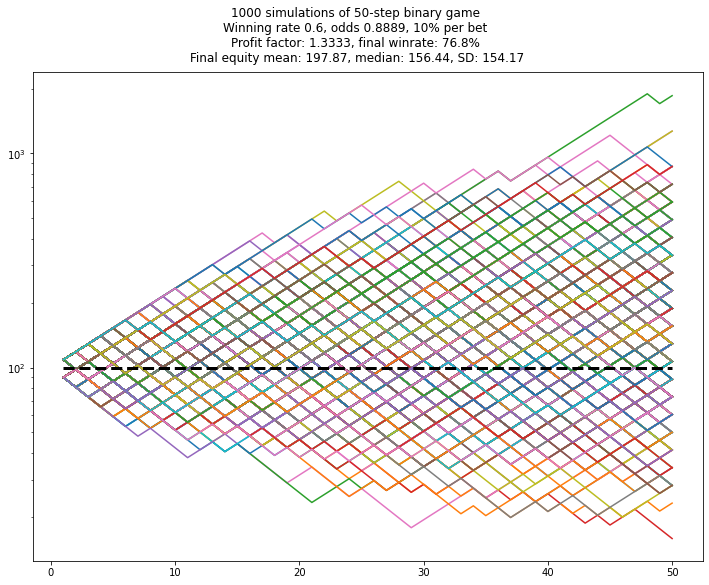

In [9]:
profitfactor1 = 4 / 3
p2 = 0.6   
b2 = getOdds(p2, profitfactor1)

plotSim_fixPctBet(initAmount1, f1, p2, b2, numTrial1, numSim1)

### Fix p & b, vary percent-per-bet

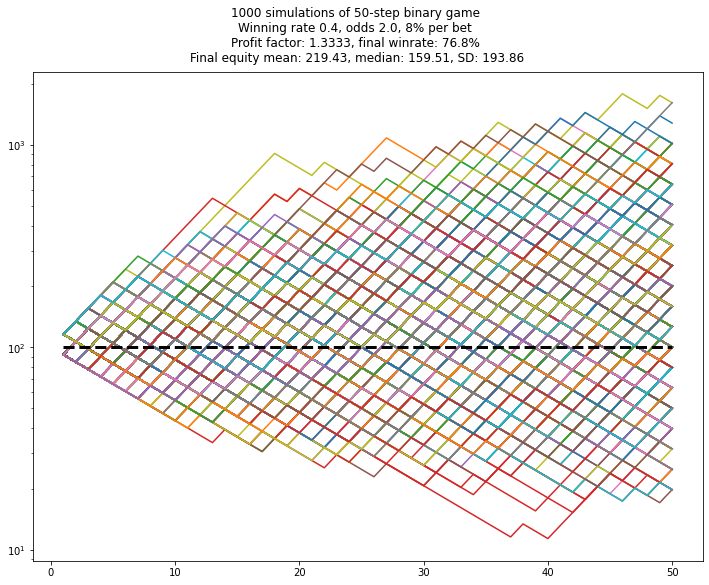

In [10]:
f2 = 8
plotSim_fixPctBet(initAmount1, f2, p1, b1, numTrial1, numSim1)

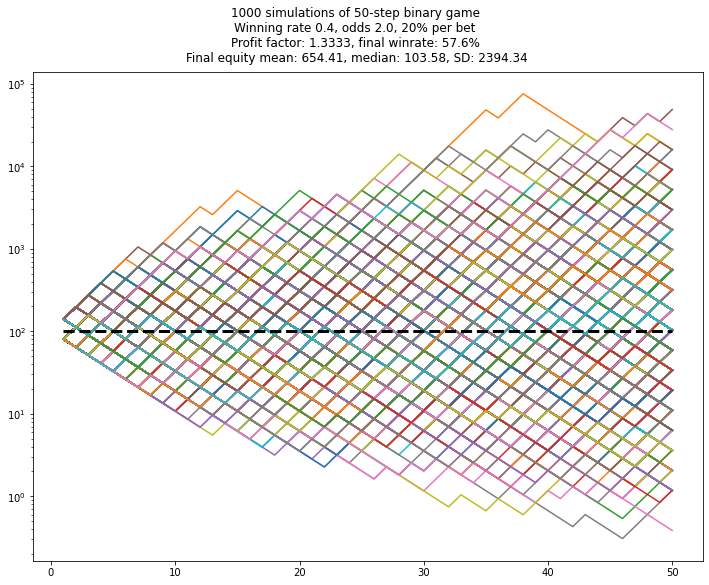

In [11]:
f3 = 20
plotSim_fixPctBet(initAmount1, f3, p1, b1, numTrial1, numSim1)

## Risk control & ruin

### percent ruin function

In [12]:
def getRuin(dfSim, initAmount=100, numTrial=50, level=0.1):
    """Obtain percentage of simulations with final amount dropping below the given equity threshold."""   
    return dfSim[dfSim[numTrial] <= level*initAmount].shape[0] / dfSim.shape[0]

### Using above (p, b) pair and vary number of trials & ruin level

In [13]:
arrLevel = np.arange(0.05, 0.55, 0.05)  ## equity threshold level from 5% to 25%
arrTrial = range(50, 300, 50)  ## Number of betting trials from 50 to 250

dfRuin1 = pd.DataFrame(columns=arrTrial, index=arrLevel)

for numTrial, level in product(arrTrial, arrLevel):
    dfSim = getSim_fixPctBet(initAmount1, f1, p1, b1, numTrial, numSim1)
    dfRuin1.loc[level, numTrial] = getRuin(dfSim, initAmount1, numTrial, level)

print(f'% of final equity below X% of initial for f = {f1}%: \n\n {dfRuin1}')

% of final equity below X% of initial for f = 10%: 

         50     100    150    200    250
0.05      0  0.002  0.009  0.012  0.011
0.10  0.001  0.006  0.009  0.018   0.01
0.15  0.006  0.024  0.031  0.018  0.025
0.20  0.017  0.049   0.04  0.029   0.03
0.25  0.026  0.042  0.048  0.045  0.039
0.30  0.039  0.071  0.051  0.055  0.056
0.35  0.053  0.059  0.063  0.065  0.057
0.40   0.09  0.079  0.089  0.088  0.075
0.45  0.098  0.095   0.12  0.098  0.065
0.50  0.108   0.13  0.115  0.075   0.09


### MDD function

In [14]:
def getSimMDD(dfSim, levelsMDD=(0.2, 0.5, 0.8, 0.9)):
    """Obtain percentage of simulations with final amount dropping below the given equity threshold."""
    # Transpose the simulation dataframe
    dfSimT = dfSim.transpose()
    numTrial = dfSim.shape[1]
    numSim = dfSim.shape[0]
    # Compute MDD
    dfMDD = pd.DataFrame(columns=dfSimT.columns)
    for col in dfSimT.columns:
        dfMDD[col] = (dfSimT[col] / dfSimT[col].cummax() - 1).cummin()
    # Tranpose back to match original shape
    dfMDD = dfMDD.transpose()
    # Compute percentage of simulations having MDD greater than the levels
    dictMDD = {}
    for value in levelsMDD:
        dictMDD[value] = dfMDD[dfMDD[numTrial] <= -value].shape[0] / numSim

    return dfMDD, dictMDD   

In [15]:
dfMDD1, dictMDD1 = getSimMDD(dfSim1)
print(f'Percentage of betting series suffering \n')

for key, value in dictMDD1.items():
    print(f'{round(100*key)}% MDD: {round(100*value, 2)}%')

Percentage of betting series suffering 

20% MDD: 100.0%
50% MDD: 65.7%
80% MDD: 6.8%
90% MDD: 0.9%


### Fix p, b and raise f to 20%

In [16]:
dfSim2, dictKPI2 = getSimKPI_fixPctBet(initAmount1, f3, p1, b1, numTrial1, numSim1)
for key, value in dictKPI2.items():
    print(f'{key}: {value}')

dfRuin2 = pd.DataFrame(columns=arrTrial, index=arrLevel)

for numTrial, level in product(arrTrial, arrLevel):
    dfSim = getSim_fixPctBet(initAmount1, f3, p1, b1, numTrial, numSim1)
    dfRuin2.loc[level, numTrial] = getRuin(dfSim, initAmount1, numTrial, level)

print(f'\nPercentage of final equity below X% of initial for f = {f1}%: \n\n {dfRuin2}')

dfMDD2, dictMDD2 = getSimMDD(dfSim2)

print(f'\nPercentage of betting series suffering \n')

for key, value in dictMDD2.items():
    print(f'{round(100*key)}% MDD: {round(100*value, 2)}%')

p: 0.4
b: 2.0
f: 20
profitfactor: 1.3333
win%: 54.6
amountAvg: 701.23
amountMed: 103.58
amountStd: 2702.06

Percentage of final equity below X% of initial for f = 10%: 

         50     100    150    200    250
0.05  0.045  0.115  0.168  0.204  0.256
0.10  0.092  0.177  0.242  0.273  0.264
0.15  0.151  0.218  0.294    0.3  0.321
0.20  0.215  0.245  0.279  0.323   0.34
0.25  0.238  0.304  0.359  0.353  0.345
0.30  0.239   0.32  0.331  0.352  0.355
0.35  0.347  0.324  0.314   0.36    0.4
0.40  0.318  0.383  0.393  0.424  0.415
0.45  0.338  0.414  0.382  0.422  0.434
0.50  0.367  0.387    0.4  0.418   0.41

Percentage of betting series suffering 

20% MDD: 100.0%
50% MDD: 98.7%
80% MDD: 67.3%
90% MDD: 38.7%


## Optimal f% / Kelly Formula

### Expected geometric growth (= 1 + percentage-return)

In [17]:
def getExpGrowth(p=0.5, b=1.5, f=0.1, n=1):
    """
    Obtain expected geometric return of repeated trials of a binary game.
    p: winning rate
    b: odds / reward-risk-ratio
    f: fixed percent of each bet
    n: number of trials
    """
    logGrowth = p * np.log(1 + b * f) + (1 - p) * np.log(1 - f)
    
    return np.exp(n * logGrowth)

def plotExpGrowth(p=0.5, b=1.5, n=1, fMin=0, fMax=0.5, step=0.01):
    """Plot expected geometric growth given fixed winning rate & odds, and identify optimal f%."""
    # Form pandas Series of expected return of varying f%
    arrFpct = np.arange(fMin, fMax, step)
    dictGrowth = {f: getExpGrowth(p, b, f, n) - 1 for f in arrFpct}
    dfGrowth = pd.DataFrame(pd.Series(dictGrowth))
    # Plot interactive diagram of f-percent curve
    fig = px.line(x=dfGrowth.index, y=dfGrowth[0], labels={'x': 'f%', 'y': f'%return on {n} trials'})
    fig.add_trace(go.Scatter(x=dfGrowth.index, y=np.repeat(0, len(arrFpct)), name='0%'))
    # Identify optimal f%
    bestF = dfGrowth[0].idxmax()
    bestGrowth = dfGrowth[0].max()
    fig.add_trace(go.Scatter(x=(bestF, ), y=(bestGrowth, ), line_color='green', name='Opt-f%', mode='markers+text', 
                             marker_size=10, text=f'{bestF, round(bestGrowth, 4)}', textposition='bottom center'))
    
    # Show diagram
    fig.show()

### Example 1 (adopt above example p1 = 0.4, b1 = 2.0)

In [18]:
plotExpGrowth(p1, b1, n=50)

### Example 2 (Fix b = 2.0, improve p to 0.5, and reduce to 10 trials)

In [19]:
p4 = 0.5
b4 = 2.0
plotExpGrowth(p4, b4, n=10)

### Example 3 (Fix profit factor in eg.1 [4 / 3] and raise p to 0.6)

In [20]:
b2 = getOdds(p2, profitfactor1)
plotExpGrowth(p2, b2, n=50)

### Kelly formula (for discrete binary game ONLY)

In [21]:
def getKellyF(p, b):
    """Obtain the optimal f% by Kelly formula."""
    return round(max((p * b - 1 + p) / b, 0), 4)

### Kelly f% value for a bunch of (p, b) pair

In [22]:
arrP = np.arange(0.2, 0.85, 0.05)
arrB = np.arange(0.5, 4.25, 0.25)

dfKelly = pd.DataFrame()

for p, b in product(arrP, arrB):
    dfKelly.loc[b, f'{round(100*p, 2)}%'] = f'{round(100 * getKellyF(p, b), 2)}%'

dfKelly

20.0%  25.0%   30.0%   35.0%   40.0%   45.0%   50.0%   55.0%   60.0%  \
0.50    0%     0%      0%      0%      0%      0%      0%      0%      0%   
0.75    0%     0%      0%      0%      0%      0%      0%      0%   6.67%   
1.00    0%     0%      0%      0%      0%      0%      0%   10.0%   20.0%   
1.25    0%     0%      0%      0%      0%    1.0%   10.0%   19.0%   28.0%   
1.50    0%     0%      0%      0%      0%   8.33%  16.67%   25.0%  33.33%   
1.75    0%     0%      0%      0%   5.71%  13.57%  21.43%  29.29%  37.14%   
2.00    0%     0%      0%    2.5%   10.0%   17.5%   25.0%   32.5%   40.0%   
2.25    0%     0%      0%   6.11%  13.33%  20.56%  27.78%   35.0%  42.22%   
2.50    0%     0%    2.0%    9.0%   16.0%   23.0%   30.0%   37.0%   44.0%   
2.75    0%     0%   4.55%  11.36%  18.18%   25.0%  31.82%  38.64%  45.45%   
3.00    0%   0.0%   6.67%  13.33%   20.0%  26.67%  33.33%   40.0%  46.67%   
3.25    0%  1.92%   8.46%   15.0%  21.54%  28.08%  34.62%  41.15%  47.69%   
3.50    0%  3.57%   10.0%  16.43%  22.86%  29.29%  35.71%  42.14%  48.57%   
3.75    0%   5.0%  11.33%  17.67%   24.0%  30.33%  36.67%   43.0%  49.33%   
4.00  0.0%  6.25%   12.5%  18.75%   25.0%  31.25%   37.5%  43.75%   50.0%   

       65.0%   70.0%   75.0%   80.0%  
0.50      0%   10.0%   25.0%   40.0%  
0.75  18.33%   30.0%  41.67%  53.33%  
1.00   30.0%   40.0%   50.0%   60.0%  
1.25   37.0%   46.0%   55.0%   64.0%  
1.50  41.67%   50.0%  58.33%  66.67%  
1.75   45.0%  52.86%  60.71%  68.57%  
2.00   47.5%   55.0%   62.5%   70.0%  
2.25  49.44%  56.67%  63.89%  71.11%  
2.50   51.0%   58.0%   65.0%   72.0%  
2.75  52.27%  59.09%  65.91%  72.73%  
3.00  53.33%   60.0%  66.67%  73.33%  
3.25  54.23%  60.77%  67.31%  73.85%  
3.50   55.0%  61.43%  67.86%  74.29%  
3.75  55.67%   62.0%  68.33%  74.67%  
4.00  56.25%   62.5%  68.75%   75.0%

### Profit factor corresponding to above (p, b) pairs

In [23]:
dfProfitfactor = pd.DataFrame()

for p, b in product(arrP, arrB):
    dfProfitfactor.loc[b, f'{round(100*p, 2)}%'] = float(f'{round(getProfitfactor(p, b), 2)}')

dfProfitfactor

20.0%  25.0%  30.0%  35.0%  40.0%  45.0%  50.0%  55.0%  60.0%  65.0%  \
0.50   0.12   0.17   0.21   0.27   0.33   0.41   0.50   0.61   0.75   0.93   
0.75   0.19   0.25   0.32   0.40   0.50   0.61   0.75   0.92   1.12   1.39   
1.00   0.25   0.33   0.43   0.54   0.67   0.82   1.00   1.22   1.50   1.86   
1.25   0.31   0.42   0.54   0.67   0.83   1.02   1.25   1.53   1.88   2.32   
1.50   0.38   0.50   0.64   0.81   1.00   1.23   1.50   1.83   2.25   2.79   
1.75   0.44   0.58   0.75   0.94   1.17   1.43   1.75   2.14   2.62   3.25   
2.00   0.50   0.67   0.86   1.08   1.33   1.64   2.00   2.44   3.00   3.71   
2.25   0.56   0.75   0.96   1.21   1.50   1.84   2.25   2.75   3.38   4.18   
2.50   0.62   0.83   1.07   1.35   1.67   2.05   2.50   3.06   3.75   4.64   
2.75   0.69   0.92   1.18   1.48   1.83   2.25   2.75   3.36   4.12   5.11   
3.00   0.75   1.00   1.29   1.62   2.00   2.45   3.00   3.67   4.50   5.57   
3.25   0.81   1.08   1.39   1.75   2.17   2.66   3.25   3.97   4.88   6.04   
3.50   0.88   1.17   1.50   1.88   2.33   2.86   3.50   4.28   5.25   6.50   
3.75   0.94   1.25   1.61   2.02   2.50   3.07   3.75   4.58   5.62   6.96   
4.00   1.00   1.33   1.71   2.15   2.67   3.27   4.00   4.89   6.00   7.43   

      70.0%  75.0%  80.0%  
0.50   1.17   1.50    2.0  
0.75   1.75   2.25    3.0  
1.00   2.33   3.00    4.0  
1.25   2.92   3.75    5.0  
1.50   3.50   4.50    6.0  
1.75   4.08   5.25    7.0  
2.00   4.67   6.00    8.0  
2.25   5.25   6.75    9.0  
2.50   5.83   7.50   10.0  
2.75   6.42   8.25   11.0  
3.00   7.00   9.00   12.0  
3.25   7.58   9.75   13.0  
3.50   8.17  10.50   14.0  
3.75   8.75  11.25   15.0  
4.00   9.33  12.00   16.0

### Expected growth using kelly-f%, half-kelly and 2x-kelly

- Frequency inversely proportional to profit factor (trichotomy of win%, odds & frequency)

In [24]:
dfGrowth1 = pd.DataFrame()
dfGrowth2 = pd.DataFrame()
dfGrowth3 = pd.DataFrame()

numTrade = 50

for p, b in product(arrP, arrB):
    optF = dfKelly.loc[b, f'{round(100*p, 2)}%']
    optF = float(optF[:-1]) / 100
    pf = dfProfitfactor.loc[b, f'{round(100*p, 2)}%']
    n = int(numTrade / max(pf, 1))
    dfGrowth1.loc[b, f'{round(100*p, 2)}%'] = round(initAmount1 * getExpGrowth(p, b, optF, n), 2)
    dfGrowth2.loc[b, f'{round(100*p, 2)}%'] = round(initAmount1 * getExpGrowth(p, b, optF / 2, n), 2)
    dfGrowth3.loc[b, f'{round(100*p, 2)}%'] = round(initAmount1 * getExpGrowth(p, b, min([optF * 2, 0.999]), n), 2)

dfGrowth1

20.0%   25.0%   30.0%   35.0%   40.0%    45.0%    50.0%    55.0%  \
0.50  100.0  100.00  100.00  100.00  100.00   100.00   100.00   100.00   
0.75  100.0  100.00  100.00  100.00  100.00   100.00   100.00   100.00   
1.00  100.0  100.00  100.00  100.00  100.00   100.00   100.00   122.18   
1.25  100.0  100.00  100.00  100.00  100.00   100.31   128.20   204.64   
1.50  100.0  100.00  100.00  100.00  100.00   122.86   196.12   343.39   
1.75  100.0  100.00  100.00  100.00  112.57   170.39   295.08   519.45   
2.00  100.0  100.00  100.00  102.89  143.24   240.43   435.92   717.89   
2.25  100.0  100.00  100.00  118.32  187.73   332.55   581.79   959.03   
2.50  100.0  100.00  102.30  143.32  238.53   428.85   760.96  1143.52   
2.75  100.0  100.00  112.34  173.91  309.00   546.96   912.07  1215.27   
3.00  100.0  100.00  127.54  210.12  386.86   654.29   998.87  1414.19   
3.25  100.0  102.76  146.94  254.39  463.87   731.08  1178.31  1549.67   
3.50  100.0  109.54  171.12  300.63  529.93   865.05  1324.58  1602.50   
3.75  100.0  119.69  198.10  344.65  630.66   986.15  1420.44  1567.64   
4.00  100.0  131.41  226.34  405.80  657.78  1083.26  1455.19  1958.31   

        60.0%    65.0%    70.0%    75.0%    80.0%  
0.50   100.00   100.00   111.28   171.90   298.11  
0.75   107.66   156.84   266.86   458.33   647.53  
1.00   194.35   328.12   562.90   810.91  1010.41  
1.25   354.38   600.77   961.27  1226.22  1428.19  
1.50   595.39   865.24  1310.53  1609.46  1456.12  
1.75   884.73  1248.25  1634.99  1618.78  1636.14  
2.00  1073.46  1504.93  1641.24  1824.56  1576.01  
2.25  1265.18  1519.87  1855.25  1808.55  1320.15  
2.50  1599.15  1722.13  1884.21  1592.88  1721.04  
2.75  1871.35  1785.42  1732.03  2088.69  1189.52  
3.00  2033.24  1702.47  2266.73  1558.85  1436.33  
3.25  2058.27  2209.93  1807.90  1909.83   843.47  
3.50  1948.50  1867.43  2229.37  1235.68   957.70  
3.75  1731.28  2302.51  1570.17  1431.75  1080.68  
4.00  2122.69  1747.43  1841.98  1647.95  1212.57

In [25]:
dfGrowth2

20.0%   25.0%   30.0%   35.0%   40.0%   45.0%   50.0%    55.0%    60.0%  \
0.50  100.0  100.00  100.00  100.00  100.00  100.00  100.00   100.00   100.00   
0.75  100.0  100.00  100.00  100.00  100.00  100.00  100.00   100.00   105.68   
1.00  100.0  100.00  100.00  100.00  100.00  100.00  100.00   116.20   164.28   
1.25  100.0  100.00  100.00  100.00  100.00  100.23  120.52   171.18   257.85   
1.50  100.0  100.00  100.00  100.00  100.00  116.75  166.16   253.34   382.28   
1.75  100.0  100.00  100.00  100.00  109.32  149.60  226.90   348.09   518.95   
2.00  100.0  100.00  100.00  102.17  131.24  194.69  306.53   447.96   606.18   
2.25  100.0  100.00  100.00  113.55  161.40  250.22  384.39   563.26   693.61   
2.50  100.0  100.00  101.73  131.42  194.27  305.44  475.57   650.40   838.45   
2.75  100.0  100.00  109.20  152.50  237.71  370.38  551.11   688.00   956.34   
3.00  100.0  100.00  120.30  176.64  283.84  428.13  595.98   780.79  1031.04   
3.25  100.0  102.07  134.13  205.19  328.24  469.75  683.45   846.14  1051.79   
3.50  100.0  107.14  150.94  234.22  365.95  539.29  754.92   876.63  1018.01   
3.75  100.0  114.64  169.21  261.38  421.44  601.62  804.31   869.34   936.68   
4.00  100.0  123.18  187.99  297.99  438.07  652.42  826.36  1044.87  1109.53   

        65.0%    70.0%    75.0%   80.0%  
0.50   100.00   108.29   149.01  220.45  
0.75   139.77   206.35   303.64  382.35  
1.00   241.83   357.63   460.43  527.34  
1.25   380.39   533.45   626.91  682.40  
1.50   502.76   677.05   773.36  700.27  
1.75   667.78   807.22   786.13  772.29  
2.00   777.11   819.10   870.29  761.47  
2.25   791.56   909.36   875.77  676.50  
2.50   880.49   931.19   805.76  834.05  
2.75   915.21   883.41  1000.86  640.15  
3.00   891.71  1097.99   810.54  745.39  
3.25  1102.79   932.75   956.66  503.22  
3.50   977.49  1108.28   691.64  558.71  
3.75  1162.54   852.35   781.52  617.66  
4.00   945.18   973.98   879.14  680.12

In [26]:
dfGrowth3

20.0%   25.0%   30.0%   35.0%   40.0%   45.0%   50.0%   55.0%   60.0%  \
0.50  100.0  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00   
0.75  100.0  100.00  100.00  100.00  100.00  100.00  100.00  100.00   99.75   
1.00  100.0  100.00  100.00  100.00  100.00  100.00  100.00   99.45   92.24   
1.25  100.0  100.00  100.00  100.00  100.00  100.00  100.00   95.76   77.07   
1.50  100.0  100.00  100.00  100.00  100.00  100.58   99.95   89.45   59.62   
1.75  100.0  100.00  100.00  100.00  100.51  102.53   99.97   82.19   43.81   
2.00  100.0  100.00  100.00  100.08  102.63  105.71  100.00   75.10   32.38   
2.25  100.0  100.00  100.00  101.23  106.56  109.75   99.94   67.82   22.87   
2.50  100.0  100.00  100.08  103.98  111.38  114.27  100.00   61.72   14.19   
2.75  100.0  100.00  100.91  108.09  117.85  119.29   99.94   57.01    8.33   
3.00  100.0  100.00  102.93  113.24  124.88  124.01  100.11   51.42    4.47   
3.25  100.0  100.16  106.13  119.49  132.06  128.24   99.84   46.73    2.16   
3.50  100.0  100.88  110.36  126.29  138.84  133.70  100.15   42.83    0.83   
3.75  100.0  102.40  115.48  133.13  147.67  139.26   99.88   39.78    0.17   
4.00  100.0  104.61  120.98  141.85  152.81  143.95  100.00   33.79    0.00   

       65.0%  70.0%  75.0%  80.0%  
0.50  100.00  99.06  82.23  26.77  
0.75   93.44  66.09  15.79   0.00  
1.00   67.36  22.34   0.00   0.00  
1.25   38.24   2.30   0.00   0.07  
1.50   18.23   0.00   0.00   0.56  
1.75    5.69   0.00   0.02   1.81  
2.00    0.97   0.00   0.07   4.88  
2.25    0.01   0.00   0.27  11.13  
2.50    0.00   0.01   0.88  14.96  
2.75    0.00   0.03   1.21  27.28  
3.00    0.00   0.04   3.21  33.54  
3.25    0.00   0.17   4.03  50.97  
3.50    0.00   0.22   9.09  58.47  
3.75    0.01   0.74  10.69  66.56  
4.00    0.03   0.88  12.47  75.28

## Diversification of almost-uncorrelated betting series and kelly-f%

### Example: kelly-f% and half-kelly-f% for 5 distinct betting strategies with varying (p, b)

In [27]:
listP = [0.4, 0.55, 0.35, 0.6, 0.45]
listProfitfactor = [1.8, 1.65, 1.25, 2.0, 1.4]
listB = [round(getOdds(p, pf), 4) for p, pf in zip(listP, listProfitfactor)]
print(f'Odds list: {listB}')

listF = [round(getKellyF(p, b) * 100, 4) for p, b in zip(listP, listB)]
listHalfF = [round(f / 2, 4) for f in listF]
print(f'Kelly-opt-f% list: {listF}')
print(f'Half-Kelly-f% list: {listHalfF}')


Odds list: [2.7, 1.35, 2.3214, 1.3333, 1.7111]
Kelly-opt-f% list: [17.78, 21.67, 7.0, 30.0, 12.86]
Half-Kelly-f% list: [8.89, 10.835, 3.5, 15.0, 6.43]


### Generate 400 simulations of 50-trial binary game equity dataframe with kelly f%

In [28]:
list_dfSim1 = []
list_dfSim2 = []

initAmount10 = 100
numTrial10 = 50
numSim10 = 400
listColumns = ['p', 'b', 'profitfactor', 'f', 'win%', 'amountAvg', 'amountMed', 'amountStd']

dfKPI1 = pd.DataFrame(columns=listColumns)
dfKPI2 = pd.DataFrame(columns=listColumns)

for p, b, f in zip(listP, listB, listF):
    dfSim1, dictKPI1 = getSimKPI_fixPctBet(initAmount10, f1, p, b, numTrial10, numSim10)
    dfSim2, dictKPI2 = getSimKPI_fixPctBet(initAmount10, f1 / 2, p, b, numTrial10, numSim10)
    list_dfSim1.append(dfSim1)
    list_dfSim2.append(dfSim2)
    dfKPI1 = dfKPI1.append(dictKPI1, ignore_index=True)
    dfKPI2 = dfKPI2.append(dictKPI2, ignore_index=True)    
    
dfKPI1.rename(index={num: f'strat{num+1}' for num in range(5)}, inplace=True)
dfKPI2.rename(index={num: f'strat{num+1}' for num in range(5)}, inplace=True)

### Performance KPI for kelly-f% and MDD stat

In [29]:
levelsMDD0 = [0.1, 0.2, 0.5, 0.8]

dfMDDStat1 = pd.DataFrame(columns=levelsMDD0)

for df in list_dfSim1:
    dfMDD, dictMDD = getSimMDD(df, levelsMDD0)
    dfMDDStat1 = dfMDDStat1.append(dictMDD, ignore_index=True)
    
dfMDDStat1.rename(index={num: f'strat{num+1}' for num in range(5)}, inplace=True)

print(f'% of betting series suffering X% MDD under opt-f%: \n\n{dfMDDStat1}')

dfKPI1

% of betting series suffering X% MDD under opt-f%: 

        0.1     0.2     0.5     0.8
strat1  1.0  1.0000  0.5475  0.0225
strat2  1.0  0.9725  0.2675  0.0075
strat3  1.0  1.0000  0.7975  0.1000
strat4  1.0  0.9075  0.1275  0.0000
strat5  1.0  1.0000  0.4975  0.0275


p       b  profitfactor     f   win%  amountAvg  amountMed  \
strat1  0.40  2.7000        1.8000  10.0  92.25    1131.09     505.07   
strat2  0.55  1.3500        1.6500  10.0  90.00     398.28     270.69   
strat3  0.35  2.3214        1.2500  10.0  62.50     225.03     147.11   
strat4  0.60  1.3333        1.9999  10.0  98.25     734.01     519.45   
strat5  0.45  1.7111        1.4000  10.0  71.75     317.43     219.94   

        amountStd  
strat1    1722.57  
strat2     351.25  
strat3     347.57  
strat4     653.40  
strat5     399.71

### Performance KPI for half-kelly-f%

In [30]:
dfMDDStat2 = pd.DataFrame(columns=levelsMDD0)

for df in list_dfSim2:
    dfMDD, dictMDD = getSimMDD(df, levelsMDD0)
    dfMDDStat2 = dfMDDStat2.append(dictMDD, ignore_index=True)
    
dfMDDStat2.rename(index={num: f'strat{num+1}' for num in range(5)}, inplace=True)

print(f'% of betting series suffering X% MDD under opt-f%: \n\n{dfMDDStat2}')

dfKPI2

% of betting series suffering X% MDD under opt-f%: 

           0.1     0.2     0.5  0.8
strat1  1.0000  0.8650  0.0300  0.0
strat2  0.9775  0.6025  0.0075  0.0
strat3  1.0000  0.9575  0.1525  0.0
strat4  0.9475  0.4150  0.0000  0.0
strat5  0.9975  0.8625  0.0375  0.0


p       b  profitfactor    f   win%  amountAvg  amountMed  \
strat1  0.40  2.7000        1.8000  5.0  96.75     335.10     270.16   
strat2  0.55  1.3500        1.6500  5.0  95.25     208.77     201.47   
strat3  0.35  2.3214        1.2500  5.0  74.00     151.47     139.83   
strat4  0.60  1.3333        1.9999  5.0  98.25     265.78     248.49   
strat5  0.45  1.7111        1.4000  5.0  80.50     177.72     165.40   

        amountStd  
strat1     210.71  
strat2      91.24  
strat3      90.99  
strat4     106.82  
strat5      90.66

### Use equal-weighted allocation to obtain 400 simulations of strategy portfolio

In [31]:
listWeight = [0.2] * 5

dfSim_All1 = sum([dfSim * weight for dfSim, weight in zip(list_dfSim1, listWeight)]) 
dfSim_All2 = sum([dfSim * weight for dfSim, weight in zip(list_dfSim2, listWeight)]) 

dfSim_All1.iloc[:10, -5:]

46           47           48           49           50
s1    361.652948   325.487653   355.865906   363.783066   419.921805
s2    218.701982   236.372741   225.665780   244.873304   267.272220
s3    170.166618   195.116500   224.292787   224.006822   229.235998
s4   1120.118518  1377.392228  1655.675527  1543.232368  1913.170245
s5    503.324896   597.286820   720.276906   862.764665   797.876974
s6    641.621799   769.994972   731.619112   865.176229  1042.175297
s7    435.328923   406.866527   380.756582   368.775486   423.477743
s8   2081.575588  1903.848030  1713.463227  2111.113866  1982.288249
s9    316.878677   340.823784   381.610159   387.951338   414.078307
s10   227.932643   234.479263   267.928886   307.020227   297.173506

### KPI for first portfolio (of 5 kelly-f% strats) & compare to cell[33]

In [32]:
# Performance KPIs of kelly-f% portfolio
dictKPI_All1 = {}

dictKPI_All1['win%'] = round(100 * dfSim_All1[dfSim_All1[numTrial10] >= initAmount10].shape[0] / numSim10, 2)
dictKPI_All1['amountAvg'] = round(dfSim_All1[numTrial10].mean(), 2)
dictKPI_All1['amountMed'] = round(dfSim_All1[numTrial10].median(), 2)
dictKPI_All1['amountStd'] = round(dfSim_All1[numTrial10].std(), 2)      

# Performance KPIs of half-kelly-f% portfolio
dictKPI_All2 = {}

dictKPI_All2['win%'] = round(100 * dfSim_All2[dfSim_All2[numTrial10] >= initAmount10].shape[0] / numSim10, 2)
dictKPI_All2['amountAvg'] = round(dfSim_All2[numTrial10].mean(), 2)
dictKPI_All2['amountMed'] = round(dfSim_All2[numTrial10].median(), 2)
dictKPI_All2['amountStd'] = round(dfSim_All2[numTrial10].std(), 2)      

# Combined
dfKPI_All = pd.DataFrame(columns=['win%', 'amountAvg', 'amountMed', 'amountStd'])
dfKPI_All = dfKPI_All.append(dictKPI_All1, ignore_index=True)
dfKPI_All = dfKPI_All.append(dictKPI_All2, ignore_index=True)
dfKPI_All = dfKPI_All.transpose()
dfKPI_All = dfKPI_All.rename(columns={0: 'opt-f%', 1: 'half-opt-f%'})

# MDD stats
dfMDD_All1, dictMDD_All1 = getSimMDD(dfSim_All1, levelsMDD0)
dfMDD_All2, dictMDD_All2 = getSimMDD(dfSim_All2, levelsMDD0)

for key, value in dictMDD_All1.items():
    dfKPI_All.loc[f'%(Sim)_{round(key*100, 0)}%MDD', 'opt-f%'] = value
    
for key, value in dictMDD_All2.items():
    dfKPI_All.loc[f'%(Sim)_{round(key*100, 0)}%MDD', 'half-opt-f%'] = value
    
dfKPI_All


opt-f%  half-opt-f%
win%             100.0000       99.750
amountAvg        561.1700      227.770
amountMed        461.3800      221.550
amountStd        395.1500       55.180
%(Sim)_10.0%MDD    0.9775        0.315
%(Sim)_20.0%MDD    0.4500        0.005
%(Sim)_50.0%MDD    0.0025        0.000
%(Sim)_80.0%MDD    0.0000        0.000

### Check correlation of random simulation (of same index number) of each strategy

In [33]:
numStrat = np.random.randint(1, numSim10 + 1)

dfStrat = pd.DataFrame()
numIndex = 1

for df in list_dfSim1:
    dfStrat = pd.concat([dfStrat, df.loc[[f's{numStrat}']]], axis=0)
    dfStrat.rename(index={f's{numStrat}': f'strat{numIndex}'}, inplace=True)
    numIndex += 1
    
dfStrat = dfStrat.transpose()

for col, b, f in zip(dfStrat.columns, listB, listF):
    dfStrat[col] = np.round(dfStrat[col] / dfStrat[col].shift(1), 4)

dfStrat.tail(10)

strat1  strat2  strat3  strat4  strat5
41    1.27   1.135  0.9000  1.1333  0.9000
42    0.90   1.135  0.9000  1.1333  0.9000
43    0.90   1.135  1.2321  1.1333  0.9000
44    1.27   1.135  0.9000  1.1333  0.9000
45    1.27   0.900  1.2321  1.1333  0.9000
46    0.90   0.900  0.9000  1.1333  1.1711
47    0.90   0.900  0.9000  1.1333  0.9000
48    1.27   0.900  0.9000  0.9000  0.9000
49    0.90   1.135  0.9000  0.9000  0.9000
50    0.90   0.900  0.9000  1.1333  0.9000

### Check correlation of returns

- For degree of freedom around 50, critical value of dependence (at sig level 0.05) is +/- 0.231
- IF corr coefficient lies in range (-0.231, 0.231), would accept that two series are independent

In [34]:
dfStrat.corr()

strat1    strat2    strat3    strat4    strat5
strat1  1.000000  0.011032 -0.215758 -0.020870 -0.248740
strat2  0.011032  1.000000  0.127827 -0.255951 -0.023619
strat3 -0.215758  0.127827  1.000000  0.181369  0.130289
strat4 -0.020870 -0.255951  0.181369  1.000000 -0.123738
strat5 -0.248740 -0.023619  0.130289 -0.123738  1.000000